# **Heart Disease Prediction using Ensemble Learning**

**Importing Necessary Libray**

In [ ]:
#For dataset handling
import numpy as np
import pandas as pd

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Get rid of future warnings
import warnings
warnings.filterwarnings("ignore")

#For balancing the dataset
from imblearn.over_sampling import SMOTENC

#For feature selection
from sklearn.feature_selection import SelectKBest,chi2

#For scaling the dataset
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#For spliting the dataset into training and testing subset, and KFold cross validation
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score

#For Pipeline
from sklearn.pipeline import Pipeline

#Models Required
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingClassifier

#HyperParameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#For accuracy and confusion matrix and classificaion report
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score



**Collecting Data**

In [ ]:
#Mounting google drive with colab as the dataset is in drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
print(df.shape)

(4240, 16)


**Columns descriptions:**

**male - 1 for male 0 for female**

**age - Given age as integer**

**education - Given as ordinal variable**

**currentSmoker - Currently smoking or not**

**cigsPerDay - Number of cigarette per day**

**BPMeds - Currently having any medication on blood pressure or not**

**prevalentStroke - Family history of having stroke 1 for existance 0 for not**

**prevalentHyp - Family history of having hypertension 1 for existance 0 for not**

**diabetes - 1 for diabetic 0 for not**

**totChol - Total cholesterol level**

**sysBP - Systolic Blood Pressure**

**diaBP - Diastolic Blood Pressure**

**BMI - Body Mass Index**

**heartRate - Pulse rate per minute**

**glucose - Blood Glucose Level**

**TenYearCHD - Future risk of heart disease upto 10years**

In [ ]:
#Get column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
#Get statistical information
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Handling Missing Data**

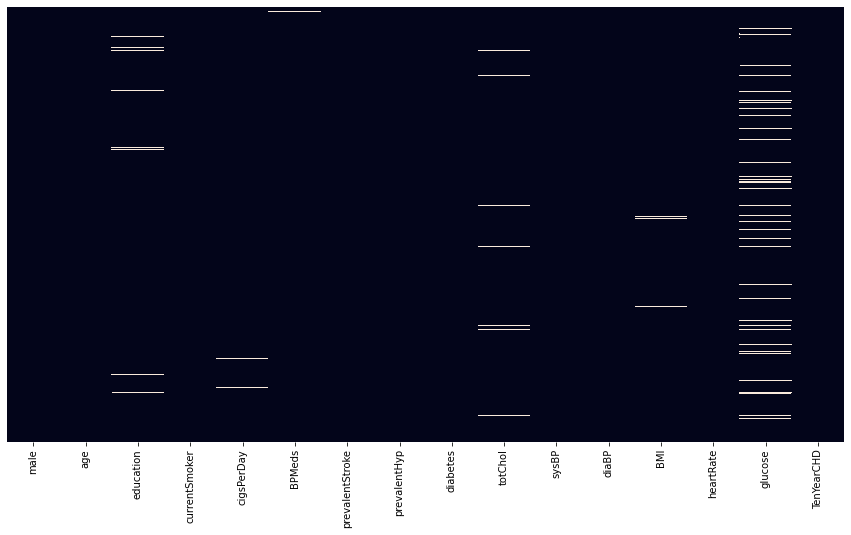

In [ ]:
#Showing Missing Data using Searborn heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),cbar = False)

In [ ]:
#Print missing value
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

**We will fill these missing values.**

**For this we are going to explore variables and their corelation.**

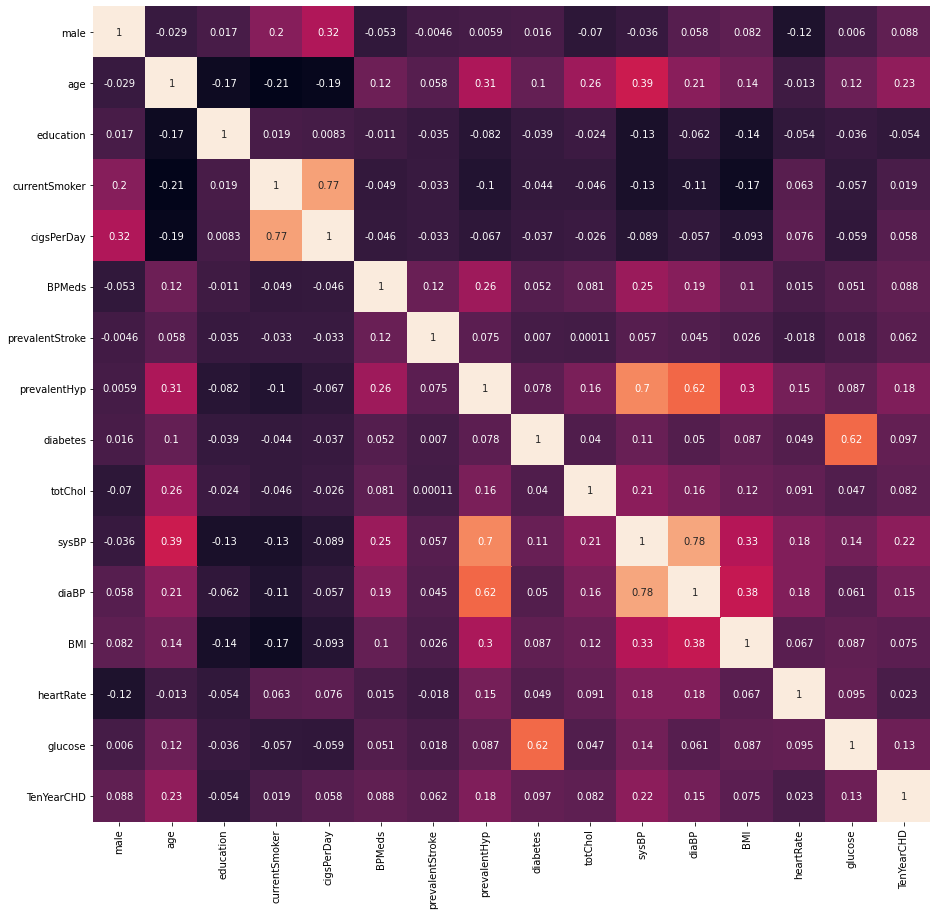

In [ ]:
#get the correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True,cbar = False)

In [ ]:
#First we will drop education column which is not relevant
df.drop('education',inplace = True,axis =1)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


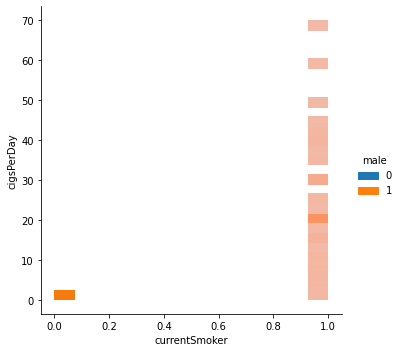

In [ ]:
#Handling Missing Values of cigsPerDay column
sns.displot(x = 'currentSmoker',y='cigsPerDay',hue = 'male',data = df)

In [ ]:
#defining imputation function for cigsperday
def impute_cig(cols):
  male = cols[0]
  currentsmoker = cols[1]
  cigsperday = cols[2]
  if pd.isnull(cigsperday):
    if male == 1 and currentsmoker == 1:
      return 10.0
    else:
      return 0.0
  else:
    return cigsperday

In [ ]:
#Now apply this function
df['cigsPerDay'] = df[['male','currentSmoker','cigsPerDay']].apply(impute_cig,axis = 1)

In [ ]:
#Now check if there null values are removed or not
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
#Now we will impute the glucose variable using diabetes variable because their are very strong co relation
def impute_glucose(cols):
  diabetes = cols[0]
  glucose = cols[1]
  if pd.isnull(glucose):
    if diabetes == 1:
      return df.glucose.max()
    else:
      return df.glucose.min()
  else:
    return glucose

In [ ]:
#Now we will apply this impute function
df['glucose'] = df[['diabetes','glucose']].apply(impute_glucose, axis =1)

In [ ]:
#Check the null values are replaced or not
print(df.isnull().sum())

male                0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64


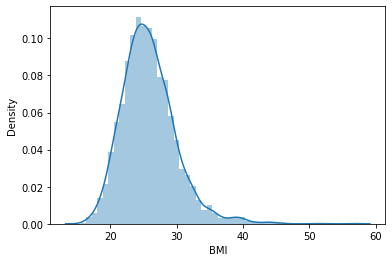

In [ ]:
#Now we will see the distribution of BMI variable
sns.distplot(df.BMI)

In [ ]:
#We can replace the null BMI values with their mean values
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [ ]:
#Check for null values
print(df.isnull().sum())

male                0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                 0
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64


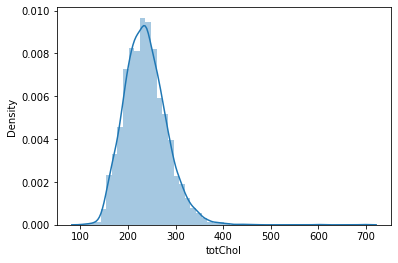

In [ ]:
#For total cholesterol variable we will check it's distribution first
sns.distplot(df['totChol'])

In [ ]:
#It will quite normally distributed and missing values number are small enough 
#So we can replace the null values with it's mean value
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())

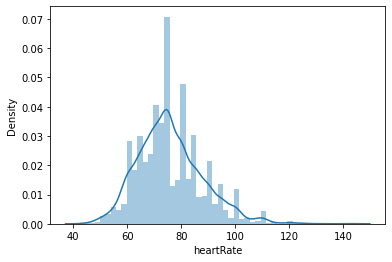

In [ ]:
#Fill the heartrate variable
sns.distplot(df['heartRate'])

In [ ]:
#As it is normally distributed and doesn't have strong co relation with any other variables
#We will replace the null value with the mean value
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())

In [ ]:
#Now I will drop the remaining null value rows
df.dropna(inplace = True)

#Now check for any null value exist or not
print(df.isnull().sum())

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


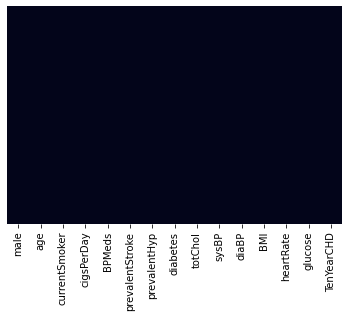

In [ ]:
#Finally check the heatmap again
sns.heatmap(df.isnull(),yticklabels=False,cbar = False)

In [ ]:
#So the ultimate shape of the dataset
print(df.shape)

(4187, 15)


**Univariate Analysis**

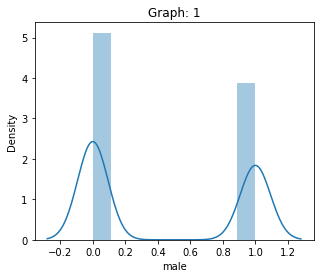

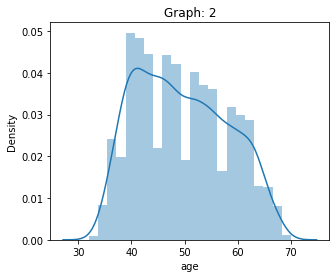

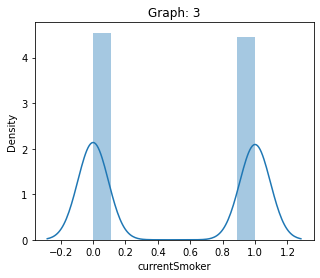

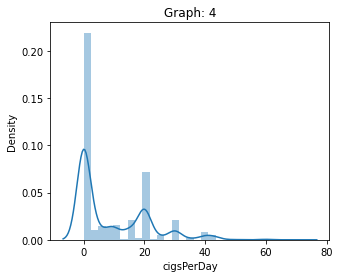

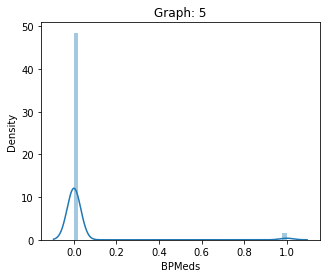

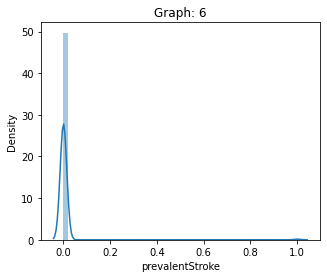

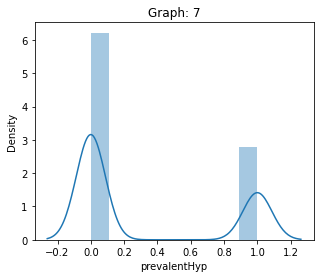

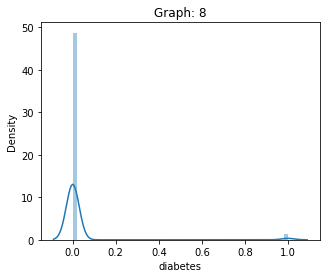

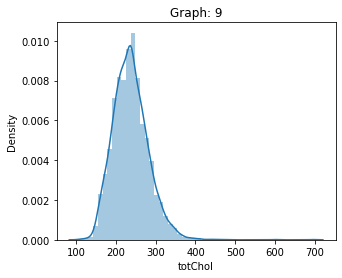

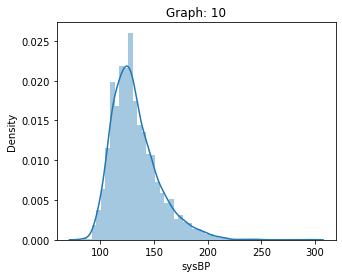

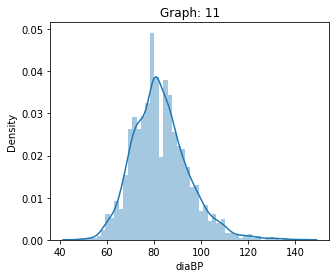

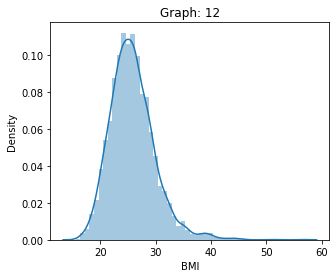

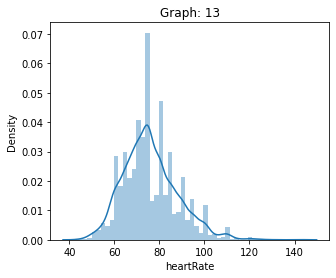

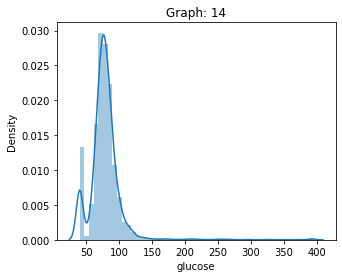

In [ ]:
#Plotting the distribution of all variables
cols = list(df.columns)
for i,column in enumerate(cols[:-1],1):
  plt.figure(figsize = (5,4))
  sns.distplot(df[column])
  plt.xlabel(column)
  plt.title("Graph: "+ str(i))

**Univariate Analysis Result:**

**1. There are more females than males in this survey.**

**2. Survey participants age group is mostly in between 30 to 70.**

**3. There are equal number of current smokers and non smokers in this survey.**

**4. Maximum smokers in this survey consumes near about 20 cigarettes daily.**

**5. Very few people in this survey are in Blood Pressure Medication.**

**6. There are almost no previous family history of stroke in this survey.**

**7. Almost 1/3rd population of this survey has the record  of hypertension in family history.**

**8. Vey few people in this survey have diabetes.**

**9. Total cholesterol level in this survey has been observed between the range of 100-400 mainly. Also maximum recored cases lie between either sides of 250.**

**10. Systolic Blood Pressure observed in this survey in between the range of 70-230 mainly. Also maximum recored cases lie between either sides of 125.**

**11. Diastolic Blood Pressure observed in this survey in between the range of 55-130 mainly. Also maximum recored cases lie between either sides of 85.**

**12. The range of 15-45 of BMI has been observed in this survey. Also maximum recored cases lie between either sides of 28.**

**13. Heart Rate count in this survey has been observed between the range of 40-125 mainly. Also maximum recored cases lie between either sides of 72.**

**14. The range of 25-150 of glucose level has been observed in this survey. Also maximum recored cases lie between either sides of 75.**

**Bivariate Analysis**

Text(0.5, 0, 'Gender: 0 for Female 1 for Male')

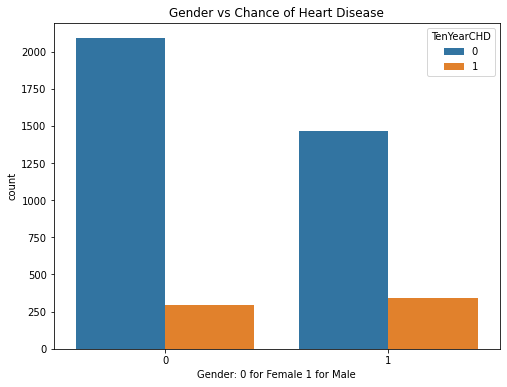

In [ ]:
#Which gender has more chance of getting heart disease
plt.figure(figsize=(8,6))
sns.countplot(x = df['male'],hue = df['TenYearCHD'])
plt.title("Gender vs Chance of Heart Disease")
plt.xlabel("Gender: 0 for Female 1 for Male")

Text(0.5, 1.0, 'Age vs Current Smokers')

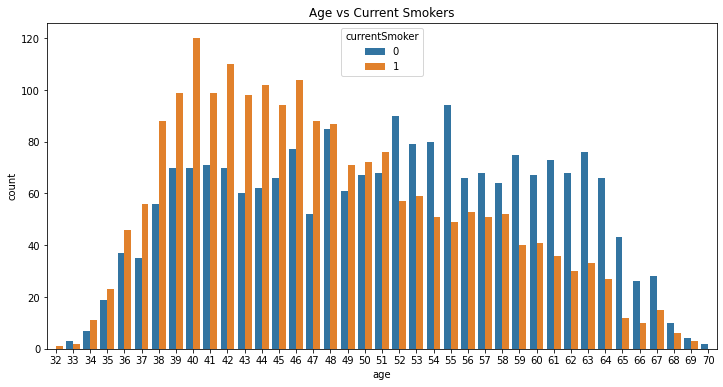

In [ ]:
#Which age group has most smoker
plt.figure(figsize = (12,6))
sns.countplot(x = 'age', data = df, hue = 'currentSmoker')
plt.title('Age vs Current Smokers')

Text(0.5, 1.0, 'Age vs Cigarette Per day vs Heart Disease Risk')

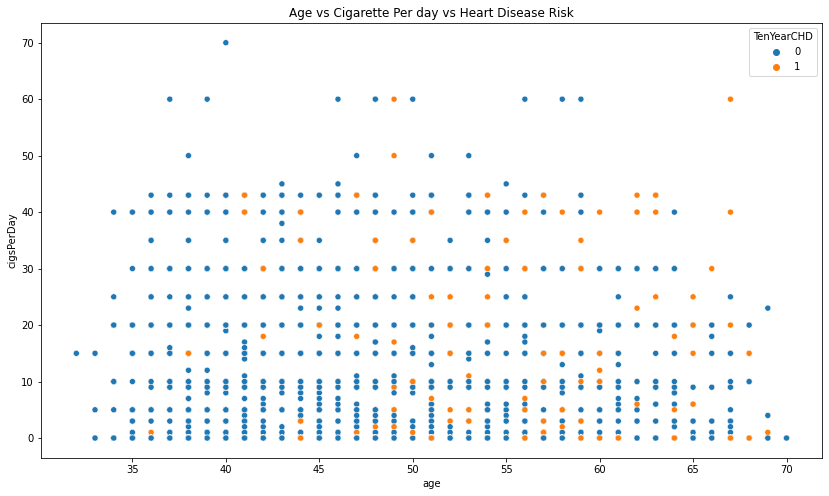

In [ ]:
#Age group vs cigsPerDay distribution with respect to heart disease risk
plt.figure(figsize = (14,8))
sns.scatterplot(x = 'age', data = df, y = 'cigsPerDay',hue = 'TenYearCHD')
plt.title('Age vs Cigarette Per day vs Heart Disease Risk')

Text(0.5, 0, '0 for Non Smoker 1 for Current Smoker')

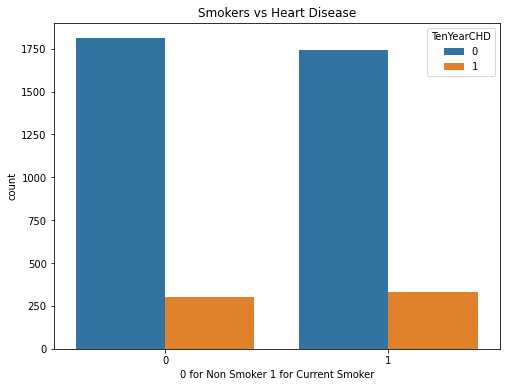

In [ ]:
#Smokers vs NonSmokers heart disease risk
plt.figure(figsize = (8,6))
sns.countplot(x = 'currentSmoker',data = df,hue = "TenYearCHD")
plt.title("Smokers vs Heart Disease")
plt.xlabel("0 for Non Smoker 1 for Current Smoker")

Text(0.5, 1.0, 'Systolic Blood Pressure vs Blood Pressure Medication vs Heart Disease Risk')

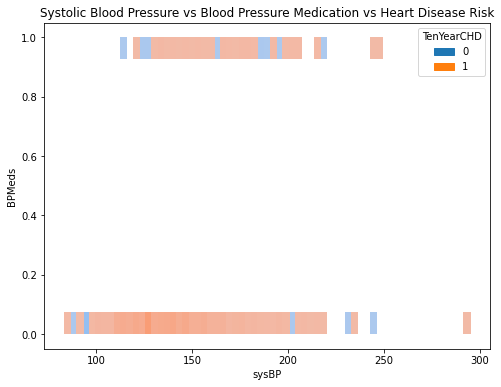

In [ ]:
#SysBp vs BP Meds vs Heart Disease
plt.figure(figsize= (8,6))
sns.histplot(x = 'sysBP',y = 'BPMeds', data = df, hue = 'TenYearCHD')
plt.title("Systolic Blood Pressure vs Blood Pressure Medication vs Heart Disease Risk")

Text(0.5, 1.0, 'Diasstolic Blood Pressure vs Blood Pressure Medication vs Heart Disease Risk')

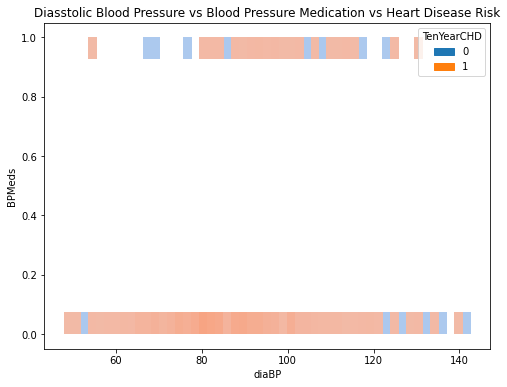

In [ ]:
#DiaBp vs BP Meds vs Heart Disease
plt.figure(figsize= (8,6))
sns.histplot(x = 'diaBP',y = 'BPMeds', data = df, hue = 'TenYearCHD')
plt.title("Diasstolic Blood Pressure vs Blood Pressure Medication vs Heart Disease Risk")

Text(0.5, 1.0, 'Heart Rate vs Blood Pressure Medication vs Heart Disease Risk')

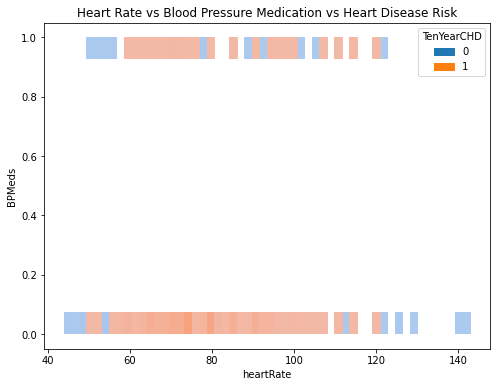

In [ ]:
#Heartrate vs BP Meds vs Heart Disease
plt.figure(figsize= (8,6))
sns.histplot(x = 'heartRate',y = 'BPMeds', data = df, hue = 'TenYearCHD')
plt.title("Heart Rate vs Blood Pressure Medication vs Heart Disease Risk")

Text(0.5, 1.0, 'Age distribution with respect to Total Cholesterol')

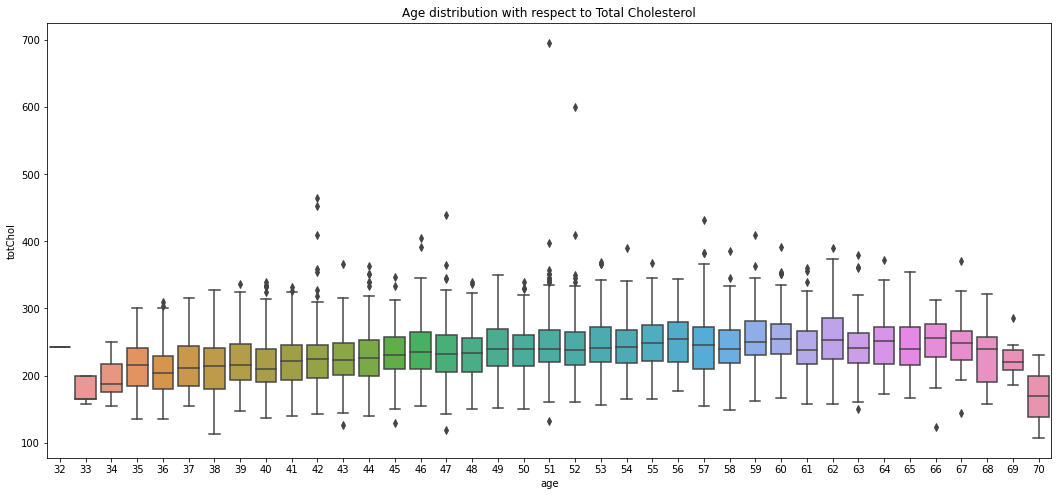

In [ ]:
#Age distribution with respect to total Cholesterol
plt.figure(figsize = (18,8))
sns.boxplot(x = 'age',y = 'totChol',data = df)
plt.title("Age distribution with respect to Total Cholesterol")

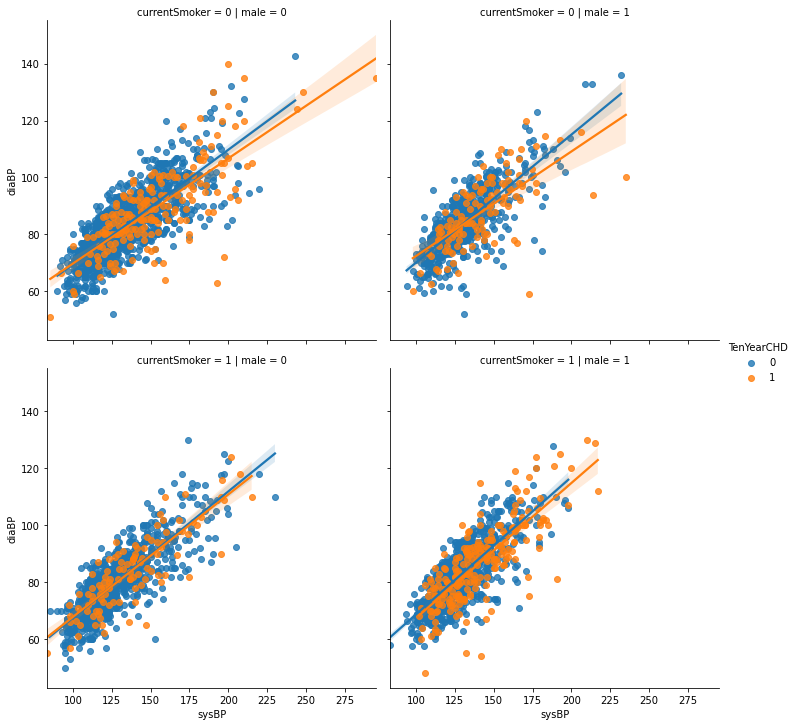

In [ ]:
#sysBP vs diaBP with respect to currentSmoker and male
sns.lmplot('sysBP','diaBP',data = df,hue = 'TenYearCHD',col = 'male',row = 'currentSmoker')

**Bivariate Analysis Result:**

**1. Gender vs Chance of Heart Disease: Accrding to this survey data male are slightly prone to be future heart disease.**

**2. Age vs Current Smokers: More of the current smokers are in the 34-50 age group.**

**3. Age vs Cigarette Per day vs Heart Disease Risk: No such relation was found in this graph.**

**4. Smokers vs Heart Disease: Current Smokers are little bit prone to heart disease risk according to survey data.**

**5. Blood Pressure & Heart Rate vs Blood Pressure Medication vs Heart Disease Risk: No such direct relation was found between these variables plotted in the above graphs.**

**6. Age distribution with respect to Total Cholesterol: Midle aged population tends to have higher cholesterol levels in this survey.**

**7. Systolic Blood Pressure vs Diastolic Blood Pressure vs Age vs Current Smoker:**

**7.1. In case of female nonsmoker as Systolic BP increases diastolic bp also increases, and risk gets higher according to this survey.**

**7.2. In case of male non smoker increasing the systolic blood pressure increase the chance of getting heart disease in future according to survey data.**

**7.3. In case of female smoker no such relation is found in the graph.**

**7.4 In case of male smoker increasing the systolic blood pressure increase the chance of getting heart disease in future according to survey data.**

**Balancing The Dataset**

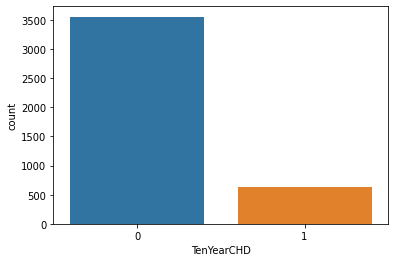

In [ ]:
#To check the dataset is balanced or not we will se the countplot of output variables
#Here how many number of heart disease risk people in this survey and how many are not
sns.countplot(x = 'TenYearCHD',data= df)

**In the upper graph we see that the dataset is truely imbalanced as the proportion of 0 and 1 varries a lot. Some type of algorithm like KNN etc. biased to give the output for the majority if the dataset is imbalanced. So we have to balance our dataset.**

**For this I am going to use SMOTE method it will create some minority datapoints(here positive cases) based on the current dataset. It uses KNN algorithm for this. SMOTE stands for Synthetic Minority Over-sampling Technique.**

In [ ]:
#For this we need to split our data column into input and output variable
X = df.drop('TenYearCHD',axis =1)
Y = df['TenYearCHD']

In [ ]:
#Lets check the current value of Y
print(Y.value_counts())

0    3554
1     633
Name: TenYearCHD, dtype: int64


In [ ]:
#Now we need SMOTE module imported
#As we have categorical columns for this we have to use SMOTENC insted of SMOTE
smote = SMOTENC(sampling_strategy = 'minority',categorical_features = [0,2,4,5,6,7])

In [ ]:
#Now fit the data into the SMOTE mode
X_smoted,Y_smoted = smote.fit_resample(X,Y)

In [ ]:
#Now check the value counts of Y_smoted
print(pd.DataFrame(Y_smoted).value_counts())

1    3554
0    3554
dtype: int64


In [ ]:
#As it returns numpy array we need to convert it into pamdas dataframe
columns = list(df.columns)
X_smoted = pd.DataFrame(X_smoted,columns=columns[:-1])
Y_smoted = pd.DataFrame(Y_smoted,columns = columns[-1:])

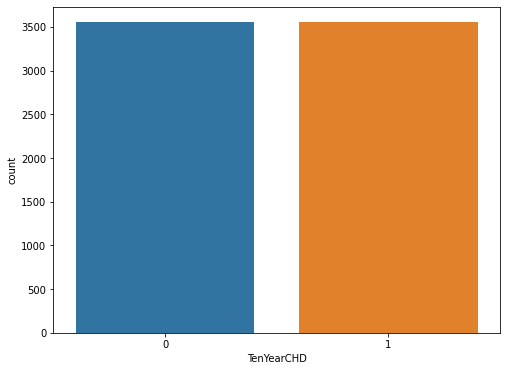

In [ ]:
#Now if we check the distribution of Ten Year Future heart disease risk
plt.figure(figsize = (8,6))
sns.countplot('TenYearCHD',data = Y_smoted)

**Feature Selection**

In [ ]:
#For this we will use SelectKBest class
#We wil create an atribute of it
KBest = SelectKBest(score_func=chi2, k = 10)

In [ ]:
#Fit our balanced dataset into this attribute

BestFit = KBest.fit(X_smoted,Y_smoted)

In [ ]:
#Now we need to show fitted columns according with their scores
data_scores = pd.DataFrame(BestFit.scores_)
data_columns = pd.DataFrame(X_smoted.columns)

In [ ]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(10,'Score'))

         Feature        Score
9          sysBP  2115.565595
13       glucose  1775.107374
1            age  1022.277045
8        totChol   698.369776
3     cigsPerDay   625.561184
10         diaBP   469.880609
6   prevalentHyp   226.948961
0           male    65.266549
11           BMI    43.208445
7       diabetes    35.840708


Text(0.5, 1.0, 'Best Feature in Descending Order')

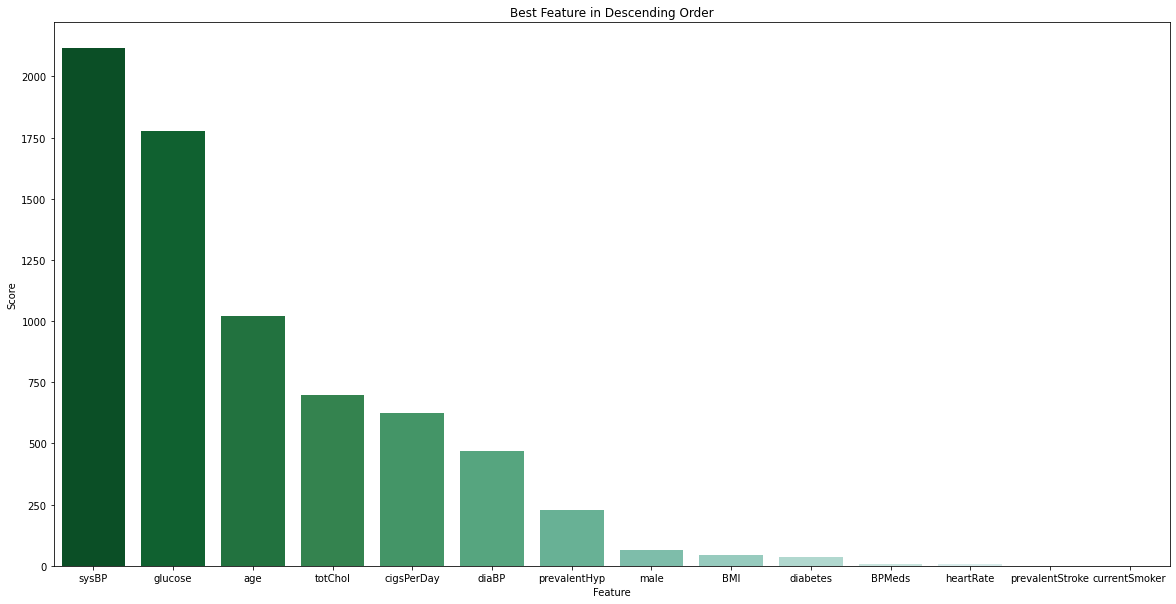

In [ ]:
#Visualize Feature Selection
scores = scores.sort_values(ascending=False,by = "Score")
plt.figure(figsize = (20,10))
sns.barplot(x='Feature',y = "Score",data = scores, palette='BuGn_r')
plt.title("Best Feature in Descending Order")

In [ ]:
#Take the 10 best features names into a list
feature = scores['Feature'].tolist()[:10]
print("The Best 10 Features are: \n")
print(feature)

The Best 10 Features are: 

['sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp', 'male', 'BMI', 'diabetes']


In [ ]:
X_smoted = X_smoted[feature]
X_sc = X_smoted
Y_sc = Y_smoted
X_smoted

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,male,BMI,diabetes
0,106.000000,77.000000,39.000000,195.000000,0.000000,70.000000,0.0,1.0,26.970000,0.0
1,121.000000,76.000000,46.000000,250.000000,0.000000,81.000000,0.0,0.0,28.730000,0.0
2,127.500000,70.000000,48.000000,245.000000,20.000000,80.000000,0.0,1.0,25.340000,0.0
3,150.000000,103.000000,61.000000,225.000000,30.000000,95.000000,1.0,0.0,28.580000,0.0
4,130.000000,85.000000,46.000000,285.000000,23.000000,84.000000,0.0,0.0,23.100000,0.0
...,...,...,...,...,...,...,...,...,...,...
7103,131.863501,102.136499,42.795252,213.658753,0.341247,84.034125,0.0,1.0,27.668845,0.0
7104,143.422193,71.622129,60.288903,246.199935,0.000000,90.066645,1.0,1.0,27.506218,0.0
7105,154.903219,79.608298,62.239628,267.608298,2.847926,92.423963,1.0,0.0,26.487140,0.0
7106,141.173273,102.196882,57.755902,266.000000,0.000000,85.929175,0.0,0.0,32.531759,0.0


**Data Spliting and Scaling and Model Building**

In [ ]:
#In univariate analaysis we see most of the attributes are normally distributed
#So standscaler is best to scale the data here
sc = StandardScaler()
X_smoted = sc.fit_transform(X_smoted)
X_smoted = pd.DataFrame(X_smoted,columns=feature)

In [ ]:
#We need a dictionary to store the model name and their accuracy using KFold Cross validation
accuracy = dict()
seed = 42 #will be used in random state

In [ ]:
#KFold cross validation
kfold = StratifiedKFold(n_splits=15)

In [ ]:
#Split the data into training and testing subset
X_train,X_test,Y_train,Y_test = train_test_split(X_smoted,Y_smoted,test_size = 0.3,random_state  = seed)

**Now we are going to take Cross Validation Score of our Single Models.**
**Models we are going to use for this classification problem:**

**1. Logistic Regression for Normal Classification Model**

**2. K-Nearest Neighbour for Normal Classification Model**

**3. Decision Tree Classifier for Normal Classification Model**

**4. Support Vector Machine**

**5. Naive Bayes**


In [ ]:
#Logistic Regression
accuracy['Logistic Regression']=cross_val_score(LogisticRegression(solver="lbfgs",max_iter=10000),X_smoted,Y_smoted,cv =5 ).mean() * 100

#KNN 
accuracy['KNN'] = cross_val_score(KNeighborsClassifier(n_neighbors=1),X_smoted,Y_smoted,cv = 5).mean() * 100

#Decision Tree
accuracy['Decision Tree'] = cross_val_score(DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30),X_smoted,Y_smoted,cv =5).mean() * 100

#Random Forest
accuracy['Support Vector Machine'] = cross_val_score(SVC(),X_smoted,Y_smoted,cv = 5).mean() * 100

#Gradient Boosting
accuracy['Naive Bayes'] = cross_val_score(GaussianNB(),X_smoted,Y_smoted,cv = 5).mean() * 100

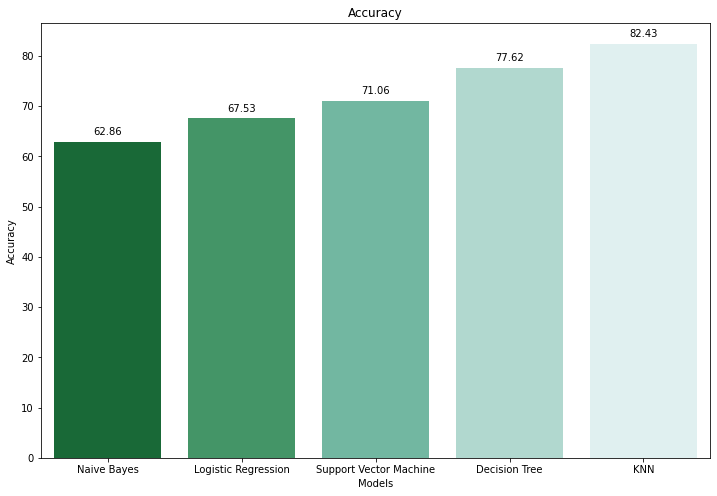

In [ ]:
#Our Final Accuracy 
accuracy_not_tuned = {"Models": list(accuracy.keys()),
                     "Accuracy": list(accuracy.values())}
accuracy_not_tuned = pd.DataFrame(accuracy_not_tuned).sort_values(ascending = True, by = 'Accuracy')
accuracy_not_tuned["Type"] = pd.Series(["Single Model" for x in range(len(df.index))])


plt.figure(figsize=(12,8))
g = sns.barplot(x='Models',y = "Accuracy",data = accuracy_not_tuned, palette='BuGn_r')
ax = g
plt.xlabel("Models")
plt.ylabel('Accuracy')
plt.title('Accuracy')

#Annoted axix
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Now implementing Ensemble Learning using same Dataset**

**Ensemble Methods used below are:**

**1. Bagging: Random Forest**

**2. Boosting: Extreme Gradient Boosting**

**3. Boosting: Light Gradient Boosting Machine**

**4. Stacking: Stacking Classifier**

**Bagging Ensemble Method**

**Random Forest**

In [ ]:
#For Accuracy we will take a dictionary
ensemble_acc = dict()

In [ ]:
#Train the data and predict using Random Forest
f_model = RandomForestClassifier()
f_model.fit(X_train,Y_train)
f_predict = f_model.predict(X_test)

In [ ]:
#Now check the accuracy using Accuracy Score,Classification Report and Confusion Matrix
print("Random Forest Accuracy: ",accuracy_score(Y_test,f_predict))
print("\n\nClassification Report: \n",classification_report(Y_test,f_predict))
print("\n\n Confusion Matrix: \n",confusion_matrix(Y_test,f_predict))
ensemble_acc["Random Forest"] = accuracy_score(Y_test,f_predict)*100

Random Forest Accuracy:  0.8462259728082513


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1059
           1       0.83      0.88      0.85      1074

    accuracy                           0.85      2133
   macro avg       0.85      0.85      0.85      2133
weighted avg       0.85      0.85      0.85      2133



 Confusion Matrix: 
 [[862 197]
 [131 943]]


**Boosting Ensemble Method**

**Extreme Gradient Boosting**

In [ ]:
#Train the data and predict using Extreme Gradient Boosting
xgb_model = XGBClassifier(n_estimators=900,max_depth=15,learning_rate=0.1)
xgb_model.fit(X_train,Y_train)
xgb_predict = xgb_model.predict(X_test)

In [ ]:
#Now check the accuracy using Accuracy Score,Classification Report and Confusion Matrix
print("Extreme Gradient Boosting Accuracy: ",accuracy_score(Y_test,xgb_predict))
print("\n\nClassification Report: \n",classification_report(Y_test,xgb_predict))
print("\n\n Confusion Matrix: \n",confusion_matrix(Y_test,xgb_predict))
ensemble_acc["Extreme Gradient Boosting"] = accuracy_score(Y_test,xgb_predict)*100

Extreme Gradient Boosting Accuracy:  0.8992030004688233


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1059
           1       0.91      0.89      0.90      1074

    accuracy                           0.90      2133
   macro avg       0.90      0.90      0.90      2133
weighted avg       0.90      0.90      0.90      2133



 Confusion Matrix: 
 [[967  92]
 [123 951]]


**Boosting Ensemble Method**

**Light Gradient Boosting Machine**

In [ ]:
#Train the data and predict using Extreme Gradient Boosting
lgbm_model = LGBMClassifier(n_estimators=900,max_depth=15,learning_rate=0.1)
lgbm_model.fit(X_train,Y_train)
lgbm_predict = lgbm_model.predict(X_test)

In [ ]:
#Now check the accuracy using Accuracy Score,Classification Report and Confusion Matrix
print("Light Gradient Boosting Machine Accuracy: ",accuracy_score(Y_test,lgbm_predict))
print("\n\nClassification Report: \n",classification_report(Y_test,lgbm_predict))
print("\n\n Confusion Matrix: \n",confusion_matrix(Y_test,lgbm_predict))
ensemble_acc["Light Gradient Boosting Machine"] = accuracy_score(Y_test,lgbm_predict)*100

Light Gradient Boosting Machine Accuracy:  0.9015471167369902


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1059
           1       0.93      0.87      0.90      1074

    accuracy                           0.90      2133
   macro avg       0.90      0.90      0.90      2133
weighted avg       0.90      0.90      0.90      2133



 Confusion Matrix: 
 [[992  67]
 [143 931]]


**Stacking Ensemble Method**

**Stacking Classifier**

In [ ]:
#For this KNN and Decision Tree Models are required
KNN_model = KNeighborsClassifier()
DTree_model = DecisionTreeClassifier()
L_model = LogisticRegression(max_iter=10000)

In [ ]:
#Create Stacking Model
Stacking_model=StackingClassifier(classifiers=[f_model,lgbm_model,xgb_model,KNN_model,L_model,DTree_model], meta_classifier= f_model,use_probas=True)

#Get crossvalidation using 5fold cross validation
stack_acc = cross_val_score(Stacking_model,X_smoted,Y_smoted, cv = 5).mean() *100

ensemble_acc["Stacking Classifier"] = stack_acc
print("Stacking Classifier Accuracy: ",stack_acc)


Stacking Classifier Accuracy:  89.11193460361011


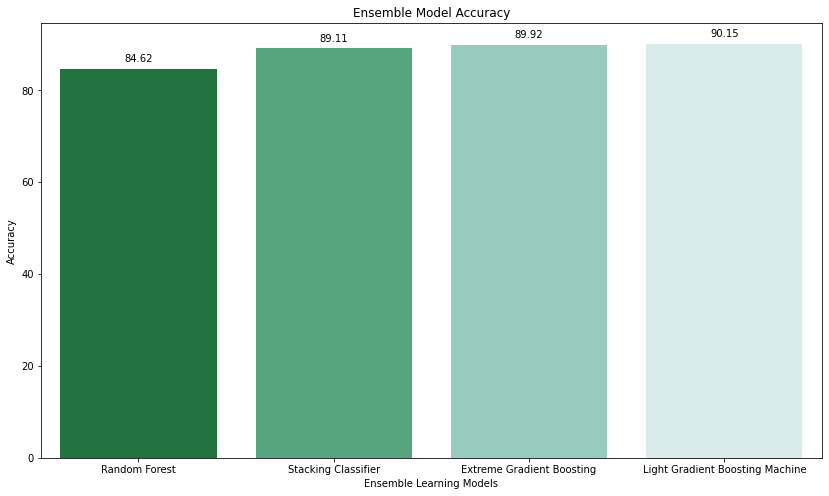

In [ ]:
#Our Final Accuracy 
ensemble_accuracy = {"Models": list(ensemble_acc.keys()),
                     "Accuracy": list(ensemble_acc.values())}
ensemble_accuracy = pd.DataFrame(ensemble_accuracy).sort_values(ascending = True, by = 'Accuracy')
ensemble_accuracy["Type"] = pd.Series(["Ensemble Model" for x in range(len(df.index))])

#Plot in a graph
plt.figure(figsize=(14,8))
g = sns.barplot(x='Models',y = "Accuracy",data = ensemble_accuracy, palette='BuGn_r')
ax = g
plt.xlabel("Ensemble Learning Models")
plt.ylabel('Accuracy')
plt.title('Ensemble Model Accuracy')

#Annoted axix
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
final_accuracy = pd.concat([accuracy_not_tuned,ensemble_accuracy],axis = 0)
final_accuracy = final_accuracy.sort_values(ascending = False, by = 'Accuracy')
final_accuracy

,Models,Accuracy,Type
2,Light Gradient Boosting Machine,90.154712,Ensemble Model
1,Extreme Gradient Boosting,89.920300,Ensemble Model
3,Stacking Classifier,89.111935,Ensemble Model
0,Random Forest,84.622597,Ensemble Model
1,KNN,82.428610,Single Model
2,Decision Tree,77.617919,Single Model
3,Support Vector Machine,71.060791,Single Model
0,Logistic Regression,67.529394,Single Model
4,Naive Bayes,62.858628,Single Model


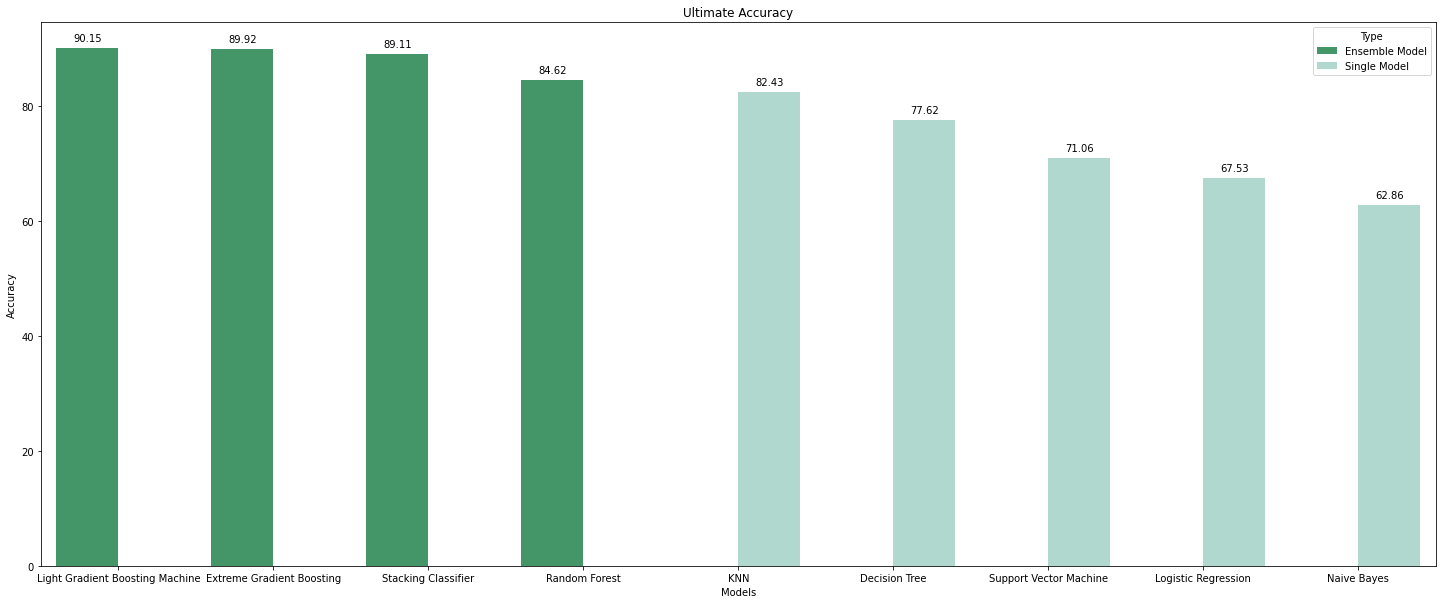

In [ ]:
#Plot in a graph
plt.figure(figsize = (25,10))
g = sns.barplot(x='Models',y = "Accuracy",hue="Type",data = final_accuracy, palette='BuGn_r')
ax = g
plt.title("Ultimate Accuracy")

#Annoted axix
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')